Hunter Bennett  
Glass Lab  
Created 180111 | Last updated 180111  
____________  
This notebook explores our rna sequencing data for the three strains of mice. This notebook is interested in identifying differential gene expression as induced by the diet across the strains. This relaxes some of the stringencies from prior analyses and should give us more results compares to prior work. See prior notebooks (171208_RNASeq_Strains.ipynb) for assessing the inter-sample variability using MDS plots, heatmaps, etc.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import subprocess
import os
import sys
import glob
import re

# import user defined packages
sys.path.insert(0, '/home/h1bennet/scripts')
import hbUtils

# plot matplotlib plots in notebook
%matplotlib inline

# load extension for running R from python
# %load_ext rpy2.ipython

In [4]:
# define path to data
datapath = {'liver':'/data/mm10/Liver/RNA/', 'kupffer':'/data/mm10/Kupffer/RNA/'}

# define output directory
outdir = '/home/h1bennet/liverStrains/results/180111_RNA_Seq/'
if not os.path.isdir(outdir):
    subprocess.call(['mkdir', outdir])

# define samples for both whole liver and kupffer
samples = {'liver':['aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam',
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam', # balb3a had 'massive splenomegaly'
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3C_TDT_JSS_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3D_TDT_JSS_16_09_28.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1A_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1C_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam',
'NCoRWT_WholeLiver_RNA_polyA_AMLNDiet_30week_LN136C_JSS_TDT_16_09_19',
'NCoRWT_WholeLiver_RNA-polyA-AMLNDiet-30week-LN141A-JSS-TDT-16-09-21',
'NCoRWT_WholeLiver_RNA-polyA-ControlDiet-30week-LN134B-JSS-TDT-16-09-21',
'NCoRWT_WholeLiver_RNA-polyA-ControlDiet-30week-LN134C-JSS-TDT-16-09-19',
'NCoRWT_WholeLiver_RNA_polyA_ControlDiet_30week_LN134D_JSS_TDT_16_09_21'],
'kupffer':["aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3A_JSSTDT_16_09_26",
"aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3B_JSSTDT_16_09_26",
"aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3c_JSS_TDT_16_09_28",
"aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1c_JSS_TDT_16_09_28",
"aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1d_JSS_TDT_16_09_28",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3a_JSS_TDT_16_09_28",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3B_JSSTDT_16_09_26",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3C_JSSTDT_16_09_26",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3d_JSS_TDT_16_09_28", # balb3a had 'massive splenomegaly'
"balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1c_JSS_TDT_16_09_28",
"balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1d_JSS_TDT_16_09_28",
"NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN136C_JSS_TDT_16_09_19",
"NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN141A_JSS_TDT_16_09_21",
"NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134B_JSS_TDT_16_09_21",
"NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134C_JSS_TDT_16_09_19",
"NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134D_JSS_TDT_16_09_21"]}

bad_samples = {'LN140D': 'cancer', 'LN136B': 'cancer', 'LN148B': 'cancer',
              'LN144A': 'cancer', 'LN144C': 'cancer', 'LN182B': 'cancer',
              'LN182B': 'cancer', 'LN203B': 'cancer', 'BALB3A': 'splenomegaly',
              'BALB4D': 'hyper-fibrosis', 'LN148B': 'cancer', 'LN166A': 'cancer'}

In [5]:
# define sample data frame
samplesDF = pd.DataFrame([s for groups in samples.values() for s in groups], columns = ['subject'])
samplesDF['sample_type'] = ['liver' if 'WholeLiver' in name else 'kupffer' for name in samplesDF.subject]
samplesDF['path'] = [datapath[key] + s for key in datapath.keys() for s in samples[key]]
samplesDF['batch'] = pd.factorize(samplesDF.subject\
             .str.replace('-','_')\
             .str.findall(r'(\d+_\d+_\d+)').str[0])[0]
samplesDF['strain'] = [j.replace('-', '_').split('_')[0].lower() for j in samplesDF.subject]
samplesDF['diet'] = ['amln' if 'AMLN' in name else 'control' for name in samplesDF.subject]
samplesDF['group'] = samplesDF.strain + '-' + samplesDF.diet
samplesDF['group_tissue'] = samplesDF.strain + '-' + samplesDF.diet + '-' + samplesDF.sample_type
samplesDF['exclusion'] = samplesDF.subject.str.contains('|'.join(bad_samples.keys()),
                                                       flags=re.IGNORECASE)

In [6]:
# set colors for the samples
color_dict = {'aj-control':'#fb9a99', 'aj-amln':'#e31a1c',
              'balbc-control':'#a6cee3', 'balbc-amln':'#1f78b4',
              'ncorwt-control':'#b2df8a', 'ncorwt-amln':'#33a02c'}
color_dict_tissue = {'aj-control-kupffer':'#fb9a99', 'aj-amln-kupffer':'#e31a1c',
            'balbc-control-kupffer':'#a6cee3', 'balbc-amln-kupffer':'#1f78b4',
            'ncorwt-control-kupffer':'#b2df8a', 'ncorwt-amln-kupffer':'#33a02c',
            'aj-control-liver':'#fdae6b', 'aj-amln-liver':'#e6550d',
            'balbc-control-liver':'#bcbddc', 'balbc-amln-liver':'#756bb1',
            'ncorwt-control-liver':'#bdbdbd', 'ncorwt-amln-liver':'#737373'}
samplesDF['color'] = [color_dict[group] for group in samplesDF.group]

# write out samplesDF
samplesDF.to_csv(outdir + 'amln_samples.txt', sep='\t')

Set some user defined functions

In [11]:
def tpm_paired_scatter(tpm, strain, tissue):
    tmp_df = hbUtils.df_col_subset(tpm, strain + '.*' + tissue)
    tmp_df.columns = pd.Series(tmp_df.columns).str.extract('[_-]([a-zA-Z]+[0-9]+[a-zA-Z])[_-]',
                                                                   flags=re.IGNORECASE, expand=False)
    g = sns.PairGrid(np.log2(tmp_df + 1))
    g = g.map(plt.scatter)
    corrs = np.log(tmp_df + 1).corr().values.flatten()
    for ax, corrval in zip(g.axes.flat, corrs):
        ax.text(0, 16, "r = %.2f" % corrval, fontsize=9)
        
def makeHub(samplelist, name, genome, plotoption=None, force=True):
    '''Takes a list of samples and runs the homer makeMultiWigHub.pl command with them
    '''
    mwcall = ['makeMultiWigHub.pl', name, genome]
    if plotoption != None:
        mwcall.extend(['-'+plotoption])
    mwcall.extend(['-url', 'http://homer.ucsd.edu/hubs/',
            '-webdir', '/homer_data/www/html/hubs'])
    if force:
        mwcall.extend(['-force'])
    mwcall.extend(['-d'])
    mwcall.extend(list(samplelist))
    subprocess.call(mwcall)

            
# define function for labeling points in scatterplots
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
def process_rpkm(rpkm, conv_tpm = False):
    rpkm = rpkm.loc[rpkm.Length >= 200, :]

    # Create column for gene
    rpkm.loc[:, 'Gene'] = pd.Series([x.split('|')[0] for x in rpkm['Annotation/Divergence']])

    # clean up the columns a bit
    pattern = r"\s+\(.+\)$"
    rpkm.columns = pd.Series(rpkm.columns)\
            .str.replace(pattern, '')\
            .str.split('/')\
            .str[-1]
        
    #subset matrix of only counts
    rpkm_mat = rpkm.set_index('RepeatID').loc[:, rpkm.columns[
            rpkm.columns.to_series().str.contains('RNA')]]

    # create tpm matrix
    if conv_tpm:
        tpm_mat = rpkm_mat.apply(lambda x: x * (10**6)/x.sum())
        return tpm_mat
    else:
        return rpkm_mat

In [53]:
makeHub(samplesDF.loc[(samplesDF.sample_type=='kupffer') & (samplesDF.exclusion==False), 'path'], 'hrb_kupffer_rna', 'mm10')

#### Anotate the RNA Seq Samples using python wrapper for annotateRepeats from the Homer package

In [11]:
# set analyses we want to do 
# No longer include genes. After discussion with Ty Troutman running analyzeRepeats with
# the 'condenseGenes' flag will collapse transcripts into one. Thus the ideal way to do
# RNA Seq for now is 'exons' - count only in exons, along with condenseGenes.
analyses = [# ('genes', False, None),
            # ('genes', True, None),
            # ('genes', 'False', 'rlog'), # ignore the rlog transform values for now
            # ('genes', False, 'rpkm'),
            ('exons', False, None),
            ('exons', True, None),
            ('exons', False, 'rlog'), # ignore the rlog transform values for now
            ('exons', False, 'rpkm')]

In [12]:
# run annotate repeats with set of analysis options
for count_type, raw, norm in analyses:
    
    # generate file name
    filename = outdir + '/rnaseq_matrix_condenseGenes_' + count_type
    if raw:
        filename += '_raw'
    if norm != None:
        filename += ('_'+ str(norm))
    filename += '.txt'
    
    # run annotate repeats
    if not os.path.isfile(filename):
        out, err = hbUtils.run_annotateRepeats(samplesDF.path,
                countType=count_type, raw=raw, norm=norm, print_out=True)
        f = open(filename, 'w')
        f.write(out.decode('utf-8'))
        f.close()
        print(err.decode('utf-8'))

analyzeRepeats.pl rna mm10 -count exons -condenseGenes -norm 1e7 -d /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam /data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam /data/mm1

	Tag Directories:
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA

	Normalizing with -rlog (R must be installed with package DESeq2)
	Tag Directories:
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_s

	Tag Directories:
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA

###  First take a look at pairwise scatterplots of the individuals

we will use a tpm matrix for most of our plotting

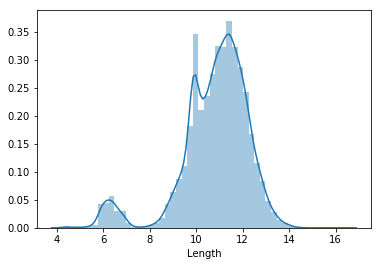

In [80]:
rpkm = pd.read_csv(outdir + '/rnaseq_matrix_condenseGenes_exons_rpkm.txt', sep='\t')
sns.distplot(np.log2(rpkm.Length + 1))

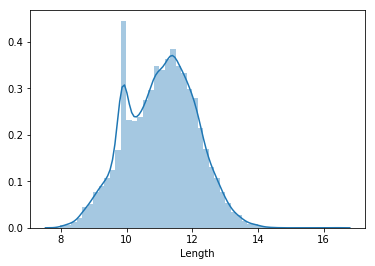

In [84]:
# Filter small mRNAs (transcriptsdd with length < 250 - mostly snoRNAs)
rpkm = rpkm.loc[rpkm.Length >= 250, :]
sns.distplot(np.log2(rpkm.Length + 1))

In [8]:
tpm_mat = process_rpkm(rpkm, conv_tpm=True)

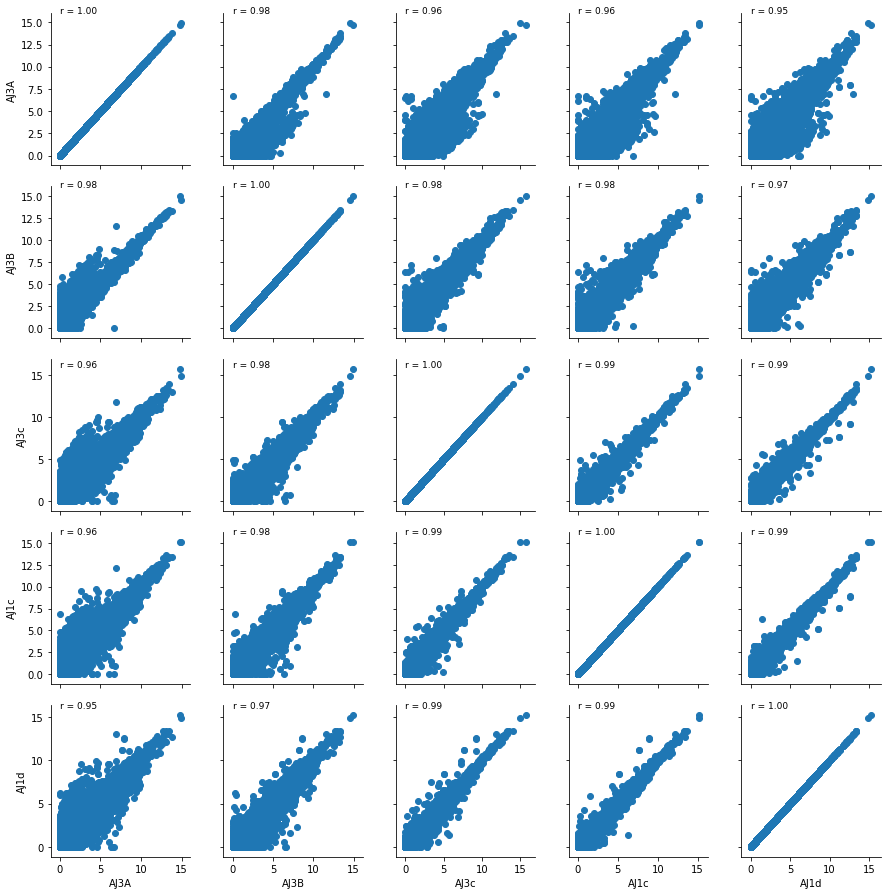

In [9]:
tpm_paired_scatter(tpm_mat, 'aj', tissue='Kupffer')

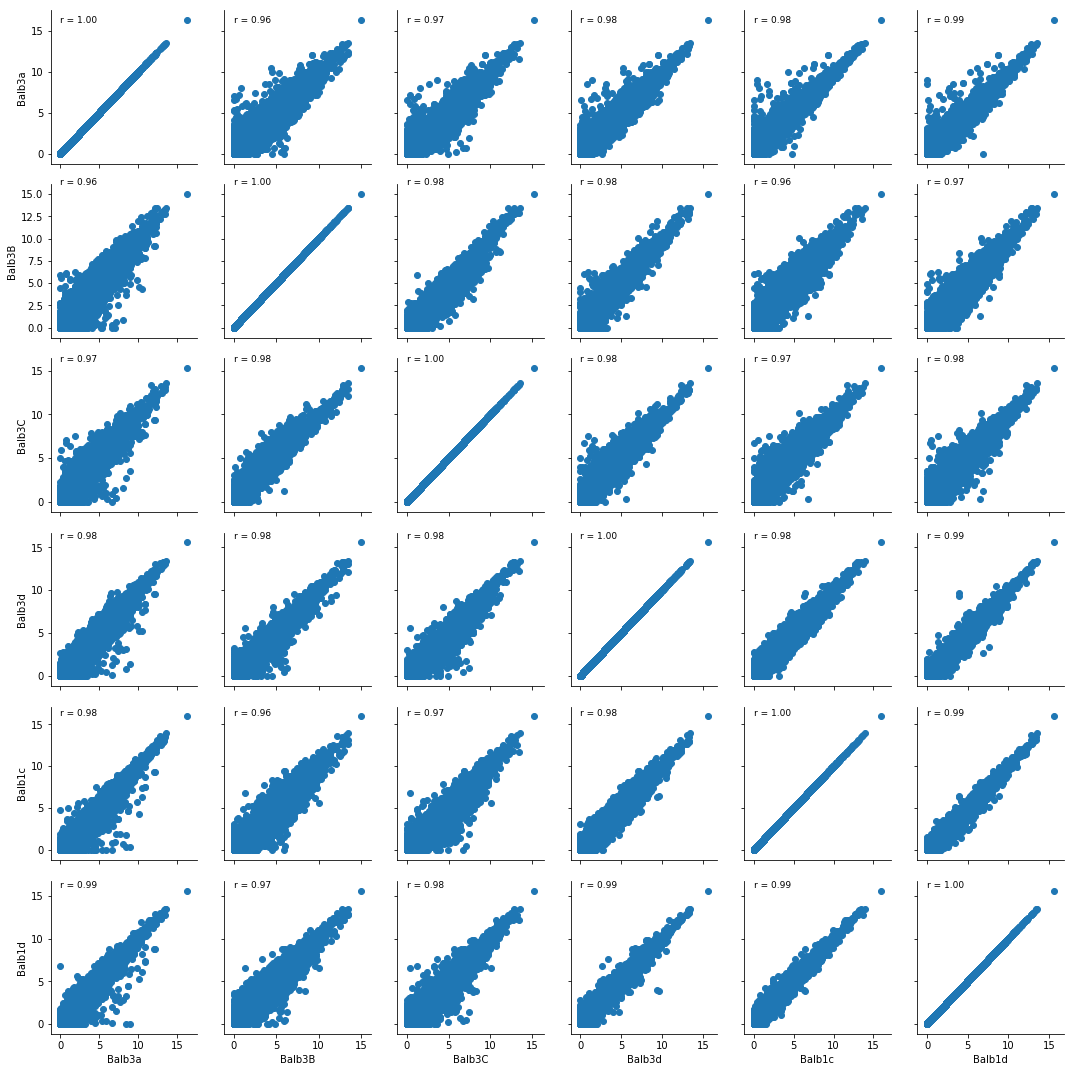

In [10]:
tpm_paired_scatter(tpm_mat, 'balb', tissue='Kupffer')

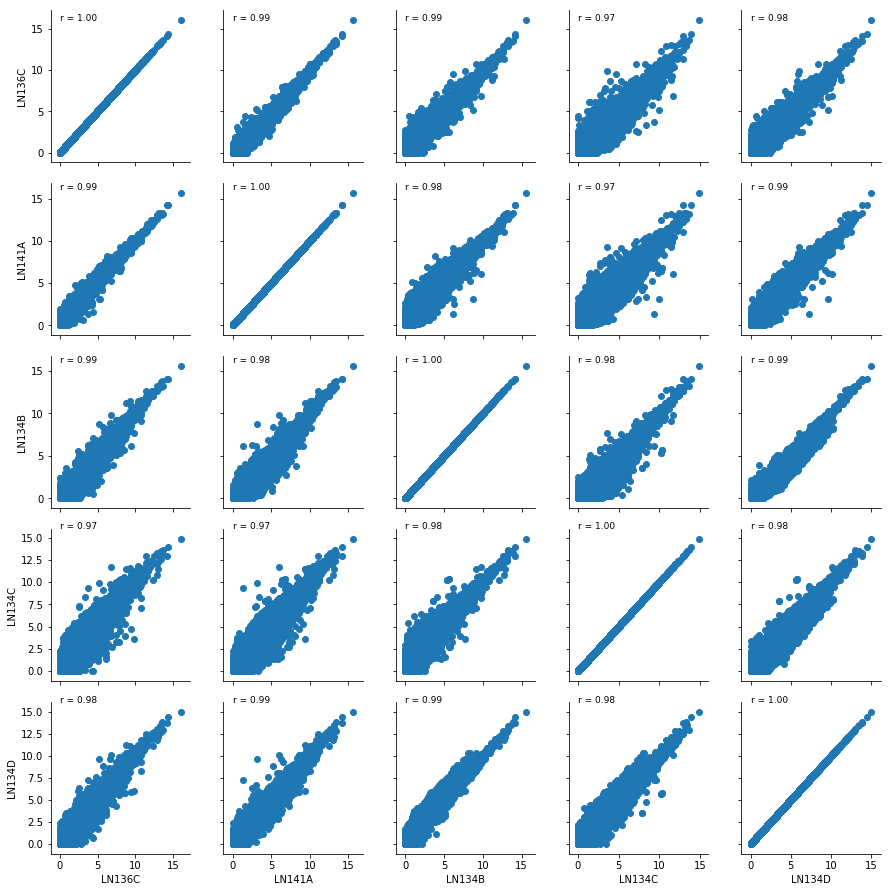

In [11]:
tpm_paired_scatter(tpm_mat, 'ncor', tissue='kupffer')

## Differential Analysis (DESeq2)

Prep data for importing into R

In [86]:
raw_counts_file = '/rnaseq_matrix_condenseGenes_exons_raw.txt'
counts_df = pd.read_csv(outdir + raw_counts_file, sep='\t')

In [88]:
# import the raw count file
raw_counts_file = '/rnaseq_matrix_condenseGenes_exons_raw.txt'
counts_df = pd.read_csv(outdir + raw_counts_file, sep='\t')

# remove samples with length < 250bp
counts_df = counts_df.loc[counts_df.Length >= 250, :]

# drop samples that need to be excluded
to_drop = pd.Series(counts_df.columns).str.contains(
        '|'.join(samplesDF.subject[samplesDF.exclusion == True]))
to_drop[0] = False
counts_df = counts_df.loc[:, list(~to_drop)]
counts_df.head()

# create gene name column
counts_df['Gene'] = pd.Series([x.split('|')[0] for x in counts_df['Annotation/Divergence']])

# clean up columns
counts_df.columns = pd.Series(counts_df.columns)\
        .str.split(r" \(").str[0]\
        .str.split('/.*/').str[-1]
counts_df = counts_df.set_index('Transcript/RepeatID')

# subset just the samples
counts_mat_l = hbUtils.df_col_subset(hbUtils.df_col_subset(counts_df, 'liver'), 'aj|balb|ncor')
counts_mat_k = hbUtils.df_col_subset(hbUtils.df_col_subset(counts_df, 'kupffer'), 'aj|balb|ncor')

#### Write the data for DESeq2

Liver

In [89]:
# Liver
# raw count matrix for DESeq
liver_raw_counts_file = raw_counts_file.replace('.txt', '_liver_mat_deseq.txt')                                    
if not os.path.isfile(outdir + liver_raw_counts_file):
    counts_mat_l.to_csv(outdir + liver_raw_counts_file, sep='\t')
    
# Column Data Information for DESeq, make sure to drop the samples we are excluding
col_data_l = samplesDF.loc[(samplesDF.sample_type=='liver') & ~samplesDF.exclusion,
                           ['subject', 'strain', 'diet', 'sample_type']]
col_data_l = col_data_l.set_index('subject')
liver_col_file = raw_counts_file.replace('.txt', 'liver_col_info.txt')
# if not os.path.isfile(outdir + liver_col_file):
col_data_l.to_csv(outdir + liver_col_file, sep='\t')

Kupffer cells

In [91]:
kupffer_raw_counts_file

'/rnaseq_matrix_condenseGenes_exons_raw_kupffer_mat_deseq.txt'

In [93]:
# raw count matrix for DESeq
kupffer_raw_counts_file = raw_counts_file.replace('.txt', '_kupffer_mat_deseq.txt')                                   
# if not os.path.isfile(outdir + kupffer_raw_counts_file):
counts_mat_k.to_csv(outdir + kupffer_raw_counts_file, sep='\t')

# Column Data Information for DESeq, make sure to drop the samples we are excluding
col_data_k = samplesDF.loc[(samplesDF.sample_type=='kupffer') & ~samplesDF.exclusion,
                           ['subject', 'strain', 'diet', 'sample_type']]
col_data_k = col_data_k.set_index('subject')
kupffer_col_file = raw_counts_file.replace('.txt', 'kupffer_col_info.txt')
# if not os.path.isfile(outdir + kupffer_col_file):
col_data_k.to_csv(outdir + kupffer_col_file, sep='\t')

### Analyze Kupffer Cell Data

#### First lets try and figure out what model we should use. DESeq has the ability to model interaction terms between the strain and diet, however this would make for a fairly complicated downstream analysis.
____
To try and figure out how to analyze this data lets use the likelihood ratio test in DESeq to assess the differences in dispersions between the fitted count data (one version fitted with the full model, one with reduced). This should give us a gene by gene assessment of how well the model explains the data compared to a simpler null.

Actually, Michael Love wrote a blog post pointint out that using the likelihood ratio test can be used to test whether fold changes are significantly different across different conditions (https://support.bioconductor.org/p/61509/). However he doesn't touch on how this extends to other analyses. It would be worth looking through the genes that this analysis turns up on the genome browser

In [16]:
%%R -i counts_mat_k,col_data_k,outdir
# load DESeq
library("DESeq2")

col_data_k$diet <- relevel(col_data_k$diet, ref='control')
col_data_k$strain <- relevel(col_data_k$strain, ref='ncorwt')

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_k,
                             colData = col_data_k,
                             design = ~ strain + diet + strain:diet)

# run DESeq LRT to assess effect of strains on diet
dds <- DESeq(dds, test="LRT", reduced= ~ strain + diet)
res <- results(dds, alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/lrt_strainsdiet_interaction_deseq_results.txt"))

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: S4Vectors

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘BiocGenerics’


  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rp

### assess effect of interaction term

In [7]:
intx = pd.read_csv(outdir + "/lrt_strainsdiet_interaction_deseq_results.txt")

In [8]:
intx.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,NM_025491,98.003477,-3.307224,0.396270,71.630250,2.790543e-16,3.820895e-12
1,NM_178759,8862.794733,2.926704,0.402291,70.299232,5.428950e-16,3.820895e-12
2,NM_008037,1699.957760,2.039883,0.351812,59.413070,1.254919e-13,5.888081e-10
3,NM_007995,23911.241128,1.795918,0.266105,48.714933,2.640503e-11,9.291929e-08
4,NM_146119,1038.944399,-2.095822,0.328341,41.909311,7.934303e-10,2.233665e-06


In [47]:
(intx.padj <= 0.01).value_counts()

False    24439
True        98
Name: padj, dtype: int64

In [48]:
(intx.padj <= 0.1).value_counts()

False    24069
True       468
Name: padj, dtype: int64

In [34]:
anno = rpkm.iloc[:, 0:8]
anno.columns.values[0] = 'RepeatID'
anno = anno.set_index('RepeatID')
anno['ucsc'] =  anno.chr + ':' + anno.start.map(str) + '-' + anno.end.map(str)

In [20]:
anno.loc[intx.loc[intx.padj <= 0.01, 'Unnamed: 0'], :]

NameError: name 'anno' is not defined

Lets plot the RPKM...

In [ ]:
# load in rpkm file without adjustments
rpkm_genes_raw = pd.read_csv(outdir + '/rnaseq_matrix_condenseGenes_exons_rpkm.txt', sep='\t')

# drop the balb3A columns
to_drop = pd.Series(rpkm_genes_raw.columns).str.contains(
        '|'.join(samplesDF.subject[samplesDF.exclusion == True]))
to_drop[0] = False
rpkm_genes_raw = rpkm_genes_raw.loc[:, list(~to_drop)]

# generate tissue specific rpkm files for plotting
rpkm_genes_raw_k= hbUtils.df_col_subset(rpkm_genes_raw,
        'chr|start|end|strand|Length|Copies|Annotation|.*Kupffer.*')

In [ ]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join(intx.loc[intx.padj <= 0.01, 'Unnamed: 0']), by_refseq=True)

** We see above that 98 genes pass the padj (BH FDR) < 0.01 cutoff as being better fit by the interaction term model. This merits further follow up... **


#### Run DESeq2 with interaction model
____
This is following the DESeq manual for how to model interactions. See online documentation or enter '?results' in R with DESeq2 package loaded.

In [ ]:
%%R -i counts_mat_k,col_data_k,outdir
# load DESeq
library("DESeq2")

col_data_k$diet <- relevel(col_data_k$diet, ref='control')
col_data_k$strain <- relevel(col_data_k$strain, ref='ncorwt')

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_k,
                             colData = col_data_k,
                             design = ~ strain + diet + strain:diet)

# run DESeq with full model
dds <- DESeq(dds)

# diet effect for ncorwt
res <- results(dds, contrast=c('diet', 'amln', 'control'), alpha = 0.01)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/ncorwt_amln_deseq_results.txt"))

# diet effect for balbc
res <- results(dds, contrast=list( c('diet_amln_vs_control','strainbalbc.dietamln') ), alpha = 0.01)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_amln_deseq_results.txt"))

# diet effect for aj
res <- results(dds, contrast=list( c('diet_amln_vs_control','strainaj.dietamln') ), alpha = 0.01)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_amln_deseq_results.txt"))

# interaction term for condition effect between balbc and ncorwt
res <- results(dds, name='strainbalbc.dietamln', alpha = 0.01)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_ncorwt_amln_interaction_deseq_results.txt"))

# interaction term for condition effect between aj and ncorwt
res <- results(dds, name='strainaj.dietamln', alpha = 0.01)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_ncorwt_amln_interaction_deseq_results.txt"))

# interaction term for condition effect between balbc and aj
res <- results(dds, contrast=list("strainbalbc.dietamln", "strainaj.dietamln"), alpha = 0.01)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_aj_amln_interaction_deseq_results.txt"))

## In earlier versions we thresholded by AMLN fold change and p value, but after feedback from the bioinformatics team we will try simply using the interaction terms and investigate what those analyses turn up compares to the AMLN requirements 

In [12]:
# load RPKM file for plotting
# load in rpkm file without adjustments
rpkm_genes_raw = pd.read_csv(outdir + '/rnaseq_matrix_condenseGenes_exons_rpkm.txt', sep='\t')

# drop the balb3A columns
to_drop = pd.Series(rpkm_genes_raw.columns).str.contains(
        '|'.join(samplesDF.subject[samplesDF.exclusion == True]))
to_drop[0] = False
rpkm_genes_raw = rpkm_genes_raw.loc[:, list(~to_drop)]

# generate tissue specific rpkm files for plotting
rpkm_genes_raw_k= hbUtils.df_col_subset(rpkm_genes_raw,
        'chr|start|end|strand|Length|Copies|Annotation|.*Kupffer.*')
rpkm_genes_raw_l= hbUtils.df_col_subset(rpkm_genes_raw,
        'chr|start|end|strand|Length|Copies|Annotation|.*Liver.*')

In [13]:
# define function for finding unique intersection of two lists
def intersect(list1, list2):
    return list(set(list1) & set(list2))

### BALBC differentially regulated genes

In [20]:
balb_amln = pd.read_csv(outdir + "/balbc_amln_deseq_results.txt")
balb_aj = pd.read_csv(outdir + "/balbc_aj_amln_interaction_deseq_results.txt")
balb_ncor = pd.read_csv(outdir + "/balbc_ncorwt_amln_interaction_deseq_results.txt")

In [21]:
# combine into one DF
balb = balb_amln.merge(balb_aj.merge(balb_ncor, how='outer', on='Unnamed: 0',
                                    suffixes=('_balb_aj', '_balb_ncor')),
                      how='outer', on='Unnamed: 0')

Next, to start analyzing this data, we will ask how many of the differentially induced genes in balbc by the amln diet are also differentially induced in balb compared to aj

In [22]:
balb_aj_spec = ((np.abs(balb.log2FoldChange) >= 1) & (balb.padj <=0.1) & (balb.padj_balb_aj <= 0.1))
balb_aj_spec.value_counts()

False    24530
True         7
dtype: int64

In [23]:
balb_ncor_spec = ((np.abs(balb.log2FoldChange) >= 1) & (balb.padj <=0.1) & (balb.padj_balb_ncor <= 0.1))
balb_ncor_spec.value_counts()

False    24012
True       525
dtype: int64

In [24]:
((balb_aj_spec) & (balb_ncor_spec)).value_counts()

False    24530
True         7
dtype: int64

In [25]:
balb_relaxed = (balb.padj_balb_aj <= 0.1) & (balb.padj_balb_ncor <= 0.1)
balb_relaxed.value_counts()

False    24524
True        13
dtype: int64

^ thus all 19 of the balb/aj specific genes are balb ncor specific genes

In [28]:
balb_spec_refseq = balb.loc[((balb_aj_spec) & (balb_ncor_spec)), 'Unnamed: 0']

Lets plot their expression...

In [29]:
balb_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(balb_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

### Kupffer Cell Expression of Balbc specific genes

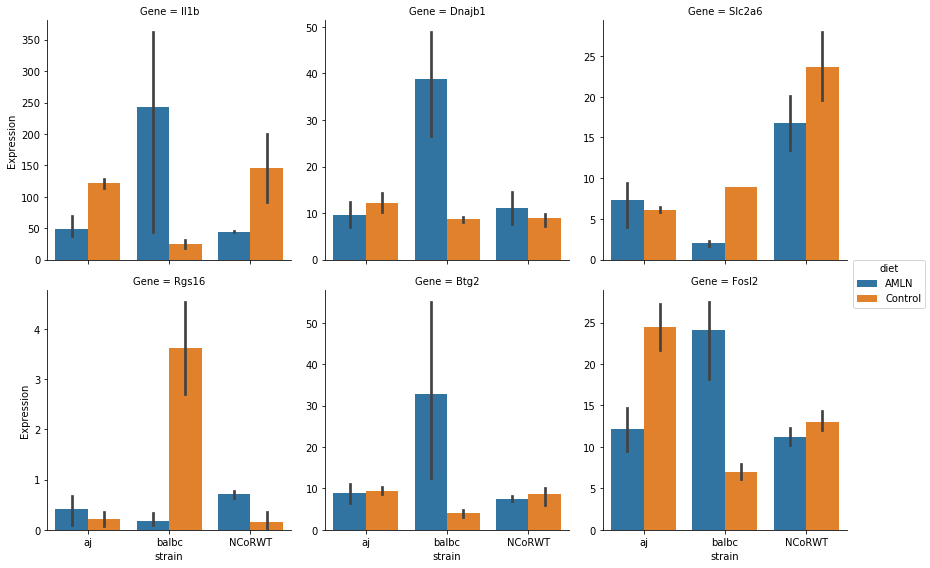

In [16]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + balb_spec_genes + '\|') + '|fosl2')

Unclear how to exactly interpret the above gene expression differences. interesting that the inflammatory gene Il1b would be increased in balb given that they do not have the inflammatory phenotype that we see in the other mice livers.  
**Jason wants to see if these genes are conserved in the strain specific response to CCl4.**

### AJ differentially regulated genes

In [30]:
aj_amln = pd.read_csv(outdir + "/aj_amln_deseq_results.txt")
aj_balb = pd.read_csv(outdir + "/balbc_aj_amln_interaction_deseq_results.txt")
aj_ncor = pd.read_csv(outdir + "/aj_ncorwt_amln_interaction_deseq_results.txt")

In [31]:
# combine into one DF
aj = aj_amln.merge(aj_balb.merge(aj_ncor, how='outer', on='Unnamed: 0',
                                    suffixes=('_aj_balb', '_aj_ncor')),
                      how='outer', on='Unnamed: 0')

In [32]:
aj_balb_spec = ((np.abs(aj.log2FoldChange) >= 1) & (aj.padj <=0.1) & (aj.padj_aj_balb <= 0.1))
aj_balb_spec.value_counts()

False    24529
True         8
dtype: int64

In [33]:
aj_ncor_spec = ((np.abs(aj.log2FoldChange) >= 1) & (aj.padj <=0.1) & (aj.padj_aj_ncor <= 0.1))
aj_ncor_spec.value_counts()

False    24524
True        13
dtype: int64

In [34]:
((aj_balb_spec) & (aj_ncor_spec)).value_counts()


False    24535
True         2
dtype: int64

In [35]:
aj_relaxed = (aj.padj_aj_ncor <= 0.1) & (aj.padj_aj_balb <= 0.1)
aj_relaxed.value_counts()

False    24534
True         3
dtype: int64

In [36]:
# aj specific refseq ids
aj_spec_refseq = aj.loc[((aj_balb_spec) & (aj_ncor_spec)), 'Unnamed: 0']

# Get aj spec gene names
aj_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(aj_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]

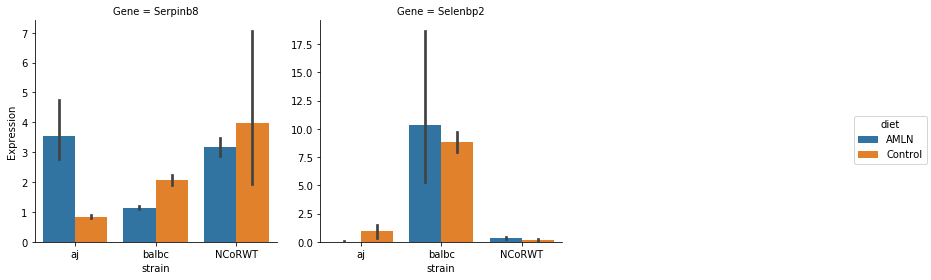

In [24]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + aj_spec_genes))

### NCoRWT (C57/BL6) differentially regulated genes

In [37]:
ncorwt_amln = pd.read_csv(outdir + "/ncorwt_amln_deseq_results.txt")
ncorwt_aj = pd.read_csv(outdir + "/aj_ncorwt_amln_interaction_deseq_results.txt")
ncorwt_balb = pd.read_csv(outdir + "/balbc_ncorwt_amln_interaction_deseq_results.txt")

In [38]:
# combine into one DF
ncorwt = ncorwt_amln.merge(ncorwt_balb.merge(ncorwt_aj, how='outer', on='Unnamed: 0',
                                             suffixes=('_ncorwt_balb', '_ncorwt_aj')),
                           how='outer', on='Unnamed: 0')

In [39]:
ncorwt_balb_spec = ((np.abs(ncorwt.log2FoldChange) >= 1) & (ncorwt.padj <=0.1) & (ncorwt.padj_ncorwt_balb <= 0.1))
ncorwt_balb_spec.value_counts()

False    24329
True       208
dtype: int64

In [40]:
ncorwt_aj_spec = ((np.abs(ncorwt.log2FoldChange) >= 1) & (ncorwt.padj <=0.1) & (ncorwt.padj_ncorwt_aj <= 0.1))
ncorwt_aj_spec.value_counts()

False    24472
True        65
dtype: int64

In [41]:
(ncorwt_aj_spec & ncorwt_balb_spec).value_counts()

False    24476
True        61
dtype: int64

In [42]:
ncorwt_relaxed = (ncorwt.padj_ncorwt_aj <= 0.1) & (ncorwt.padj_ncorwt_balb <= 0.1)
ncorwt_relaxed.value_counts()

False    24443
True        94
dtype: int64

In [43]:
# ncorwt specific refseq ids
ncorwt_spec_refseq = ncorwt.loc[((ncorwt_balb_spec) & (ncorwt_aj_spec)), 'Unnamed: 0']

# Get ncorwt spec gene names
ncorwt_spec_genes = rpkm_genes_raw.loc[rpkm_genes_raw.iloc[:, 0].str.contains('|'.join(ncorwt_spec_refseq)),
                                    'Annotation/Divergence'].str.split('\|').str[0]


#### Kupffer cell expression

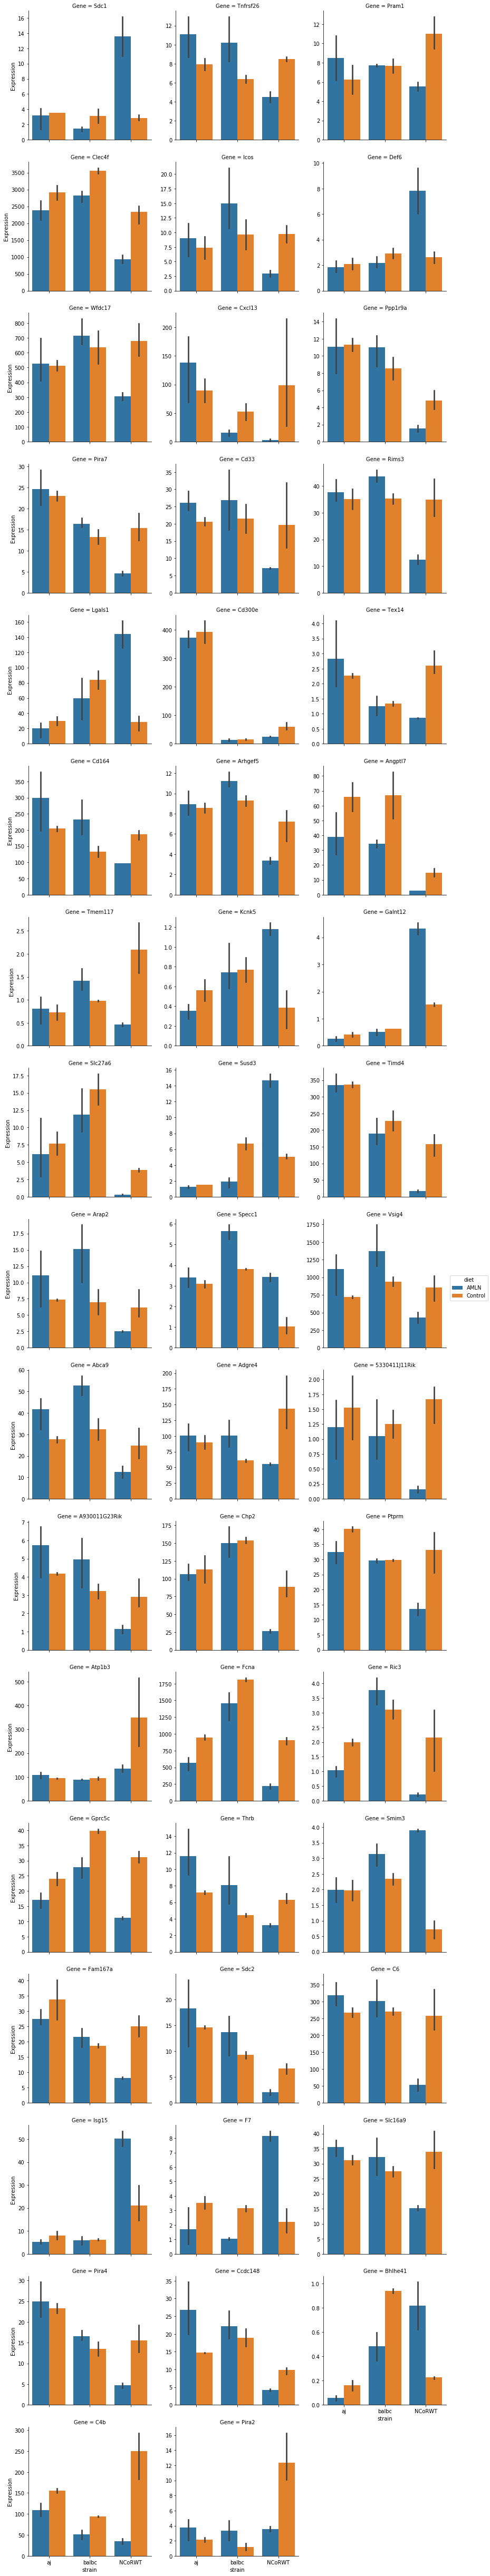

In [32]:
hbUtils.plot_gene_exp(rpkm_genes_raw_k, '|'.join('^' + ncorwt_spec_genes + '\|'))

### Lets aggregate the ones that pass this old criteria

In [75]:
(intx.padj <= 0.01).value_counts()

False    24439
True        98
Name: padj, dtype: int64

In [76]:
intx = pd.read_csv(outdir + "/lrt_strainsdiet_interaction_deseq_results.txt")
refseq_strict = list(ncorwt_spec_refseq) + list(balb_spec_refseq) + list(aj_spec_refseq)
refseq_relaxed = list(ncorwt.loc[ncorwt_relaxed, 'Unnamed: 0']) + list(aj.loc[aj_relaxed, 'Unnamed: 0']) + list(balb.loc[balb_relaxed, 'Unnamed: 0'])
refseq_intx = list(intx.loc[intx.padj <= 0.1, 'Unnamed: 0'])
refseq_intx_strict = list(intx.loc[intx.padj <= 0.01, 'Unnamed: 0'])

In [50]:
len(refseq_strict)

70

In [51]:
len(refseq_relaxed)

110

In [52]:
len(refseq_intx)

468

In [53]:
len(intersect(refseq_strict, refseq_relaxed))

70

In [54]:
len(intersect(refseq_strict, refseq_intx))

70

In [55]:
len(intersect(refseq_intx, refseq_relaxed))

110

From this is looks like we have descending orders of strictness, with the interaction method being the least strict. however they are completely self contained, with the interaction term method being the least stringent while the interaction term methods are considerably more strict.

### Lets plot some heatmaps for each of these gene sets

In [56]:
counts = rpkm_genes_raw_k
counts.columns.values[0] = 'RepeatID'
counts = counts.set_index('RepeatID')
counts = counts.iloc[:, 7:]

### quick FC calculation...

first get the mean

In [57]:
counts.columns

Index(['/data/mm10/Kupffer/RNA/aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3A_JSSTDT_16_09_26 FPKM',
       '/data/mm10/Kupffer/RNA/aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3B_JSSTDT_16_09_26 FPKM',
       '/data/mm10/Kupffer/RNA/aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3c_JSS_TDT_16_09_28 FPKM',
       '/data/mm10/Kupffer/RNA/aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1c_JSS_TDT_16_09_28 FPKM',
       '/data/mm10/Kupffer/RNA/aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1d_JSS_TDT_16_09_28 FPKM',
       '/data/mm10/Kupffer/RNA/balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3B_JSSTDT_16_09_26 FPKM',
       '/data/mm10/Kupffer/RNA/balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3C_JSSTDT_16_09_26 FPKM',
       '/data/mm10/Kupffer/RNA/balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3d_JSS_TDT_16_09_28 FPKM',
       '/data/mm10/Kupffer/RNA/balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1c_JSS_TDT_16_09_28 FPKM',
       '/data/mm10/Kupffer/RNA/balbc_KupfferTotal_RNA_pol

In [58]:
# get mean
counts['aj_amln_mean'] = counts.iloc[:, 0:3].mean(axis = 1)
counts['aj_control_mean'] = counts.iloc[:, 3:5].mean(axis = 1)
counts['balbc_amln_mean'] = counts.iloc[:, 5:8].mean(axis = 1)
counts['balbc_control_mean'] = counts.iloc[:, 8:10].mean(axis = 1)
counts['ncorwt_amln_mean'] = counts.iloc[:, 10:13].mean(axis = 1)
counts['ncorwt_control_mean'] = counts.iloc[:, 13:15].mean(axis = 1)

In [59]:
# get fc
counts['aj_fc'] = counts['aj_amln_mean']/counts['aj_control_mean']
counts['balbc_fc'] = counts['balbc_amln_mean']/counts['balbc_control_mean']
counts['ncorwt_fc'] = counts['ncorwt_amln_mean']/counts['ncorwt_control_mean']
fc = counts.loc[:, ['aj_fc', 'balbc_fc', 'ncorwt_fc']]
fc = fc.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any') # drop nan or inf values
fc = fc.loc[(fc != 0).all(axis=1), :] # drop columns with FC of zero for plotting....

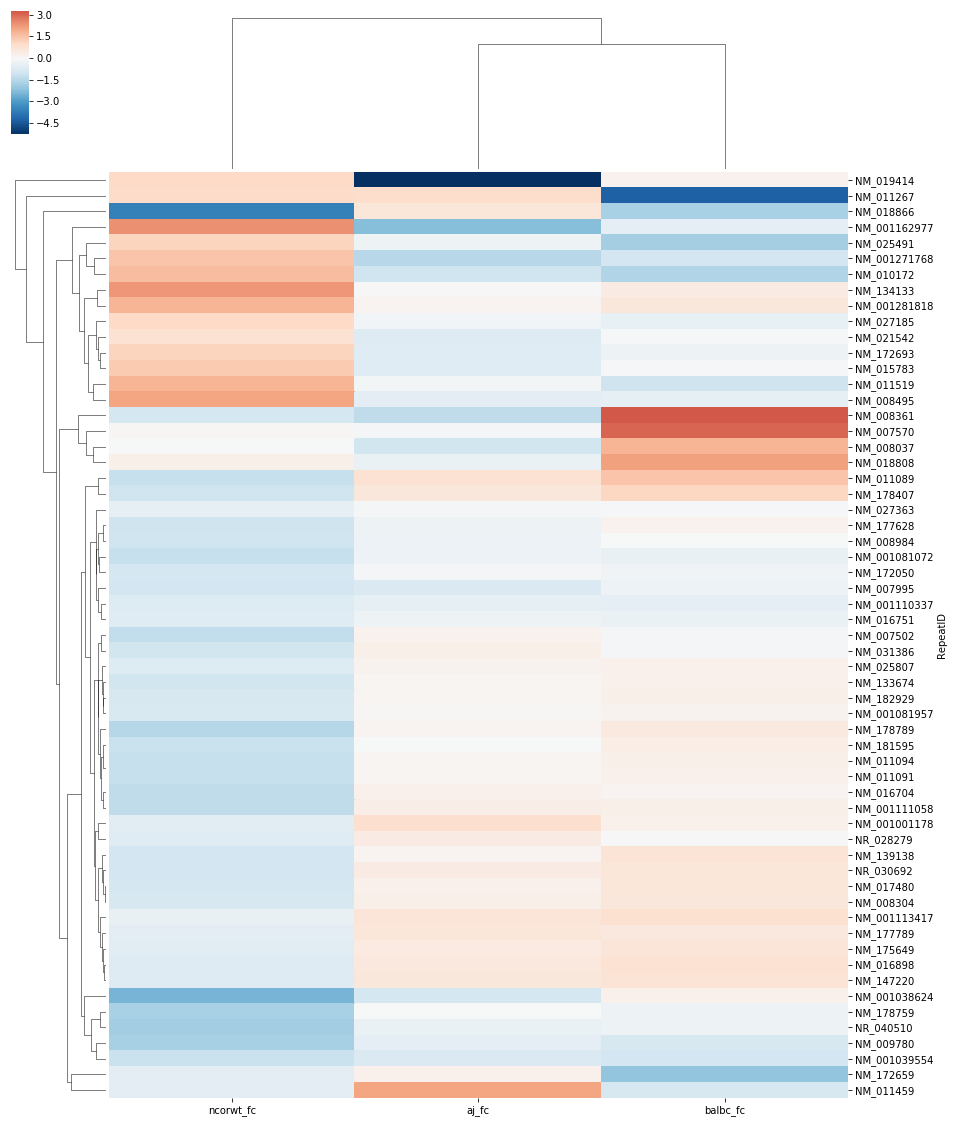

In [68]:
g = sns.clustermap(np.log2(fc.reindex(refseq_strict)).dropna(), cmap='RdBu_r', figsize=(15, 20), center=0)

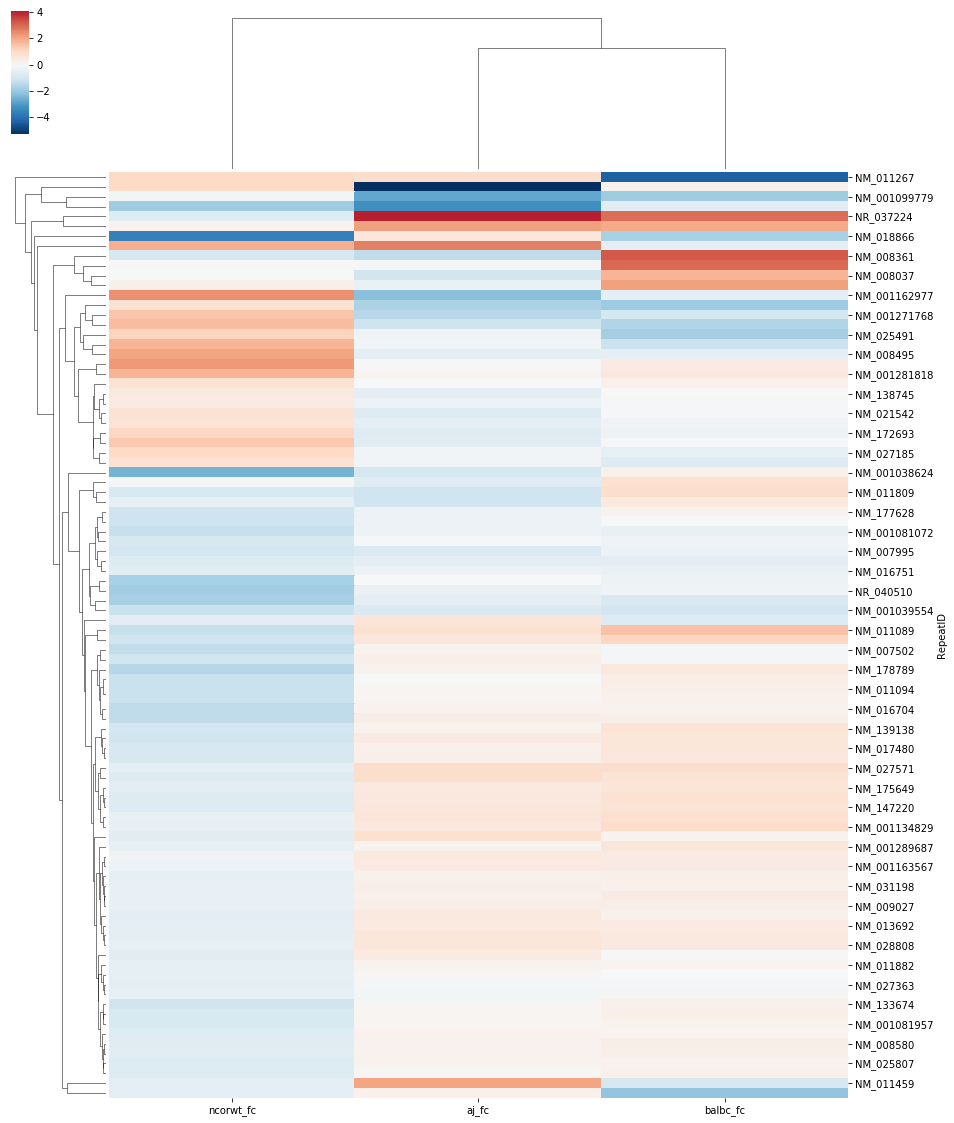

In [70]:
g = sns.clustermap(np.log2(fc.reindex(refseq_relaxed)).dropna(), cmap='RdBu_r', figsize=(15, 20), center=0)

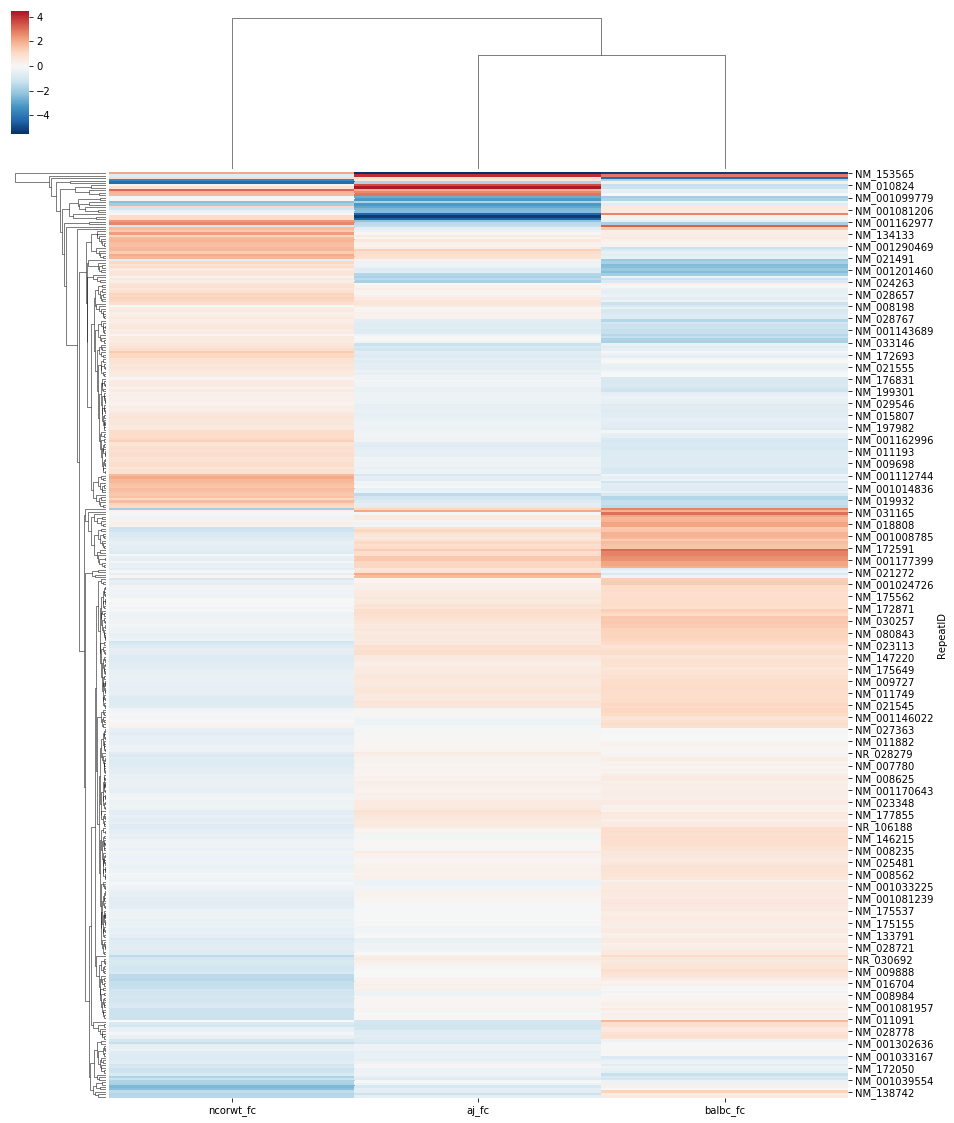

In [71]:
# IDEA: break up these clusters and do functional annotation 
# for the two big clusters for which NCORWT appears to differ from aj and balb.
g = sns.clustermap(np.log2(fc.reindex(refseq_intx).dropna()), cmap='RdBu_r', figsize=(15, 20), center=0)

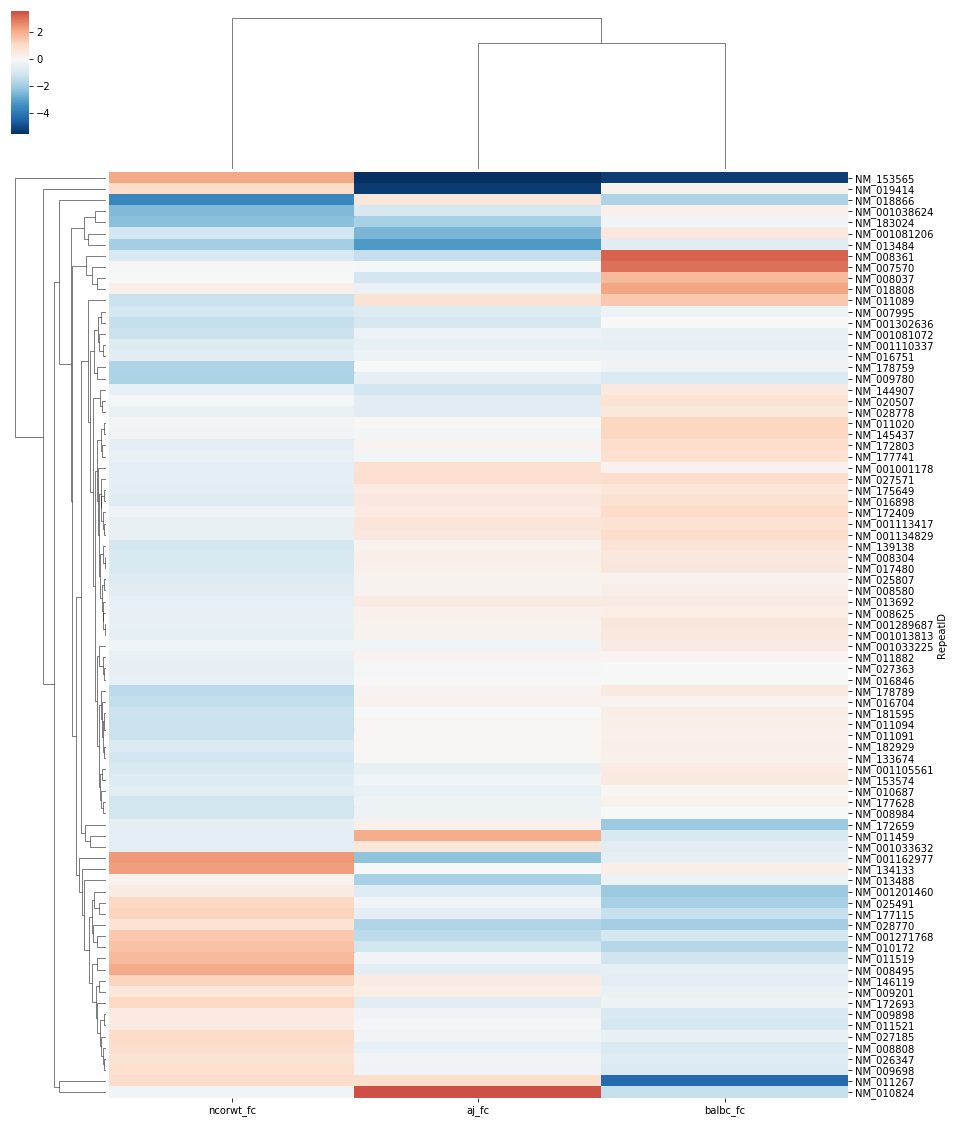

In [79]:
g = sns.clustermap(np.log2(fc.reindex(refseq_intx_strict).dropna()), cmap='RdBu_r', figsize=(15, 20), center=0)

In [140]:
set(refseq_intx) - set(refseq_relaxed)

{'NM_001001881',
 'NM_001002011',
 'NM_001005510',
 'NM_001008549',
 'NM_001008785',
 'NM_001012305',
 'NM_001013813',
 'NM_001014836',
 'NM_001024606',
 'NM_001024726',
 'NM_001024932',
 'NM_001033145',
 'NM_001033159',
 'NM_001033167',
 'NM_001033189',
 'NM_001033225',
 'NM_001033350',
 'NM_001039153',
 'NM_001039181',
 'NM_001039184',
 'NM_001039220',
 'NM_001039514',
 'NM_001039710',
 'NM_001042489',
 'NM_001042591',
 'NM_001081021',
 'NM_001081128',
 'NM_001081206',
 'NM_001081238',
 'NM_001081239',
 'NM_001081316',
 'NM_001081378',
 'NM_001081426',
 'NM_001081680',
 'NM_001085507',
 'NM_001101475',
 'NM_001105561',
 'NM_001109748',
 'NM_001110013',
 'NM_001110508',
 'NM_001112744',
 'NM_001122851',
 'NM_001136073',
 'NM_001143689',
 'NM_001146022',
 'NM_001159551',
 'NM_001160012',
 'NM_001160251',
 'NM_001161790',
 'NM_001162996',
 'NM_001163026',
 'NM_001163510',
 'NM_001163635',
 'NM_001164191',
 'NM_001164209',
 'NM_001164557',
 'NM_001164806',
 'NM_001165934',
 'NM_001167891

Have looked through NM_008235 on ucsc. so far it seems like these are legitimate calls.